In [ ]:
### done

In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
from tensorflow_core.python.keras.wrappers.scikit_learn import KerasClassifier
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import make_scorer, recall_score,precision_score, confusion_matrix,classification_report,accuracy_score
import matplotlib.pyplot as plt
import numpy as np


import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [2]:
data= pd.read_csv('../z_norm.csv')

### split data en X et Y

In [3]:
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

In [4]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)

### Neural Network

In [5]:
## ANN Model
def create_model(optimizer):
    model = Sequential()
	#Layer 1
    model.add(Dense(20, activation='relu', input_dim=20))
    model.add(Dropout(0.3))
    #Layer 2
    model.add(Dense(10, activation='relu'))
    model.add(Dropout(0.3))
    
    # output layer
    model.add(Dense(units=1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN = KerasClassifier(build_fn=create_model)
params={'optimizer' : ['adam', 'rmsprop'],
        'batch_size': [128, 256, 512, 800]}

In [7]:
##accuracy
grid_search_acc= GridSearchCV(estimator=ANN, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop])
y_predict= grid_search_acc.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 2s 42us/sample - loss: 0.6087 - accuracy: 0.6798 - val_loss: 0.5120 - val_accuracy: 0.7970
Epoch 2/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.5147 - accuracy: 0.7781 - val_loss: 0.4566 - val_accuracy: 0.8008
Epoch 3/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4779 - accuracy: 0.7926 - val_loss: 0.4386 - val_accuracy: 0.8008
Epoch 4/300
42845/42845 [==============================] - 1s 17us/sample - loss: 0.4625 - accuracy: 0.7996 - val_loss: 0.4316 - val_accuracy: 0.8008
Epoch 5/300
42845/42845 [==============================] - 1s 20us/sample - loss: 0.4509 - accuracy: 0.8007 - val_loss: 0.4277 - val_accuracy: 0.8007
Epoch 6/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4411 - accuracy: 0.8022 - val_loss: 0.4250 - val_accuracy: 0.8008
Epoch 7/300
42845/42845 [==========================

42845/42845 [==============================] - 0s 9us/sample - loss: 0.4174 - accuracy: 0.8050 - val_loss: 0.4189 - val_accuracy: 0.8010
Epoch 56/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4175 - accuracy: 0.8054 - val_loss: 0.4190 - val_accuracy: 0.8010
Epoch 57/300
42845/42845 [==============================] - 1s 12us/sample - loss: 0.4169 - accuracy: 0.8050 - val_loss: 0.4191 - val_accuracy: 0.8010
Epoch 58/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.4169 - accuracy: 0.8056 - val_loss: 0.4192 - val_accuracy: 0.8010
Epoch 59/300
42845/42845 [==============================] - 1s 17us/sample - loss: 0.4171 - accuracy: 0.8047 - val_loss: 0.4188 - val_accuracy: 0.8010
Epoch 60/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.4160 - accuracy: 0.8058 - val_loss: 0.4186 - val_accuracy: 0.8006
Epoch 61/300
42845/42845 [==============================] - 1s 28us/sample - loss: 0.4169 - accuracy: 0.8048 

42845/42845 [==============================] - 0s 8us/sample - loss: 0.4144 - accuracy: 0.8063 - val_loss: 0.4178 - val_accuracy: 0.8011
Epoch 110/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.4148 - accuracy: 0.8059 - val_loss: 0.4178 - val_accuracy: 0.8009
Epoch 111/300
42845/42845 [==============================] - 1s 12us/sample - loss: 0.4129 - accuracy: 0.8072 - val_loss: 0.4176 - val_accuracy: 0.8010
Epoch 112/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4138 - accuracy: 0.8066 - val_loss: 0.4179 - val_accuracy: 0.8008
Epoch 113/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4138 - accuracy: 0.8072 - val_loss: 0.4177 - val_accuracy: 0.8008
Epoch 114/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4138 - accuracy: 0.8064 - val_loss: 0.4175 - val_accuracy: 0.8012
Epoch 115/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4145 - accuracy: 0.8

Epoch 163/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4128 - accuracy: 0.8068 - val_loss: 0.4168 - val_accuracy: 0.8011
Epoch 164/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4131 - accuracy: 0.8067 - val_loss: 0.4169 - val_accuracy: 0.8008
Epoch 165/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4131 - accuracy: 0.8062 - val_loss: 0.4169 - val_accuracy: 0.8008
Epoch 166/300
42845/42845 [==============================] - 1s 17us/sample - loss: 0.4127 - accuracy: 0.8066 - val_loss: 0.4167 - val_accuracy: 0.8012
Epoch 167/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4133 - accuracy: 0.8068 - val_loss: 0.4168 - val_accuracy: 0.8010
Epoch 168/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.4133 - accuracy: 0.8064 - val_loss: 0.4169 - val_accuracy: 0.8010
Epoch 169/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.4130 

In [8]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'optimizer': 'rmsprop', 'batch_size': 800}
----------
[[ 1323  3629]
 [   20 13391]]
----------
              precision    recall  f1-score   support

           0       0.99      0.27      0.42      4952
           1       0.79      1.00      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.89      0.63      0.65     18363
weighted avg       0.84      0.80      0.76     18363

----------


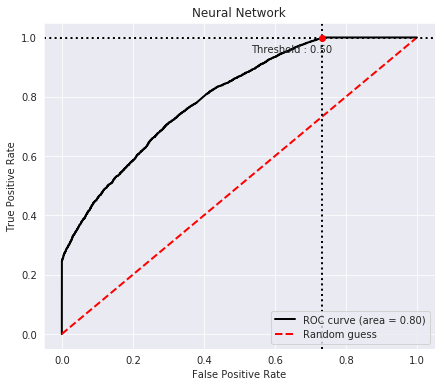

In [9]:
##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('Neural Network')
plt.show()

In [10]:
early_stop_rec = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec = KerasClassifier(build_fn=create_model)

In [11]:
## Recall
rec_avg=make_scorer(recall_score, average='macro')
grid_search_rec= GridSearchCV(estimator=ANN_rec, param_grid= params, scoring=rec_avg,cv=2, n_jobs=-1)
grid_search_rec= grid_search_rec.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_rec])
y_predict= grid_search_rec.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 4s 84us/sample - loss: 0.5244 - accuracy: 0.7585 - val_loss: 0.4344 - val_accuracy: 0.8007
Epoch 2/300
42845/42845 [==============================] - 2s 45us/sample - loss: 0.4522 - accuracy: 0.8041 - val_loss: 0.4249 - val_accuracy: 0.8008
Epoch 3/300
42845/42845 [==============================] - 2s 51us/sample - loss: 0.4400 - accuracy: 0.8053 - val_loss: 0.4218 - val_accuracy: 0.8009
Epoch 4/300
42845/42845 [==============================] - 2s 42us/sample - loss: 0.4324 - accuracy: 0.8059 - val_loss: 0.4208 - val_accuracy: 0.8009
Epoch 5/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.4269 - accuracy: 0.8059 - val_loss: 0.4203 - val_accuracy: 0.8009
Epoch 6/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4215 - accuracy: 0.8062 - val_loss: 0.4195 - val_accuracy: 0.8010
Epoch 7/300
42845/42845 [=========================

Epoch 55/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.4124 - accuracy: 0.8075 - val_loss: 0.4176 - val_accuracy: 0.8011
Epoch 56/300
42845/42845 [==============================] - 2s 48us/sample - loss: 0.4123 - accuracy: 0.8071 - val_loss: 0.4169 - val_accuracy: 0.8012
Epoch 57/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.4131 - accuracy: 0.8068 - val_loss: 0.4177 - val_accuracy: 0.8009
Epoch 58/300
42845/42845 [==============================] - 2s 47us/sample - loss: 0.4132 - accuracy: 0.8073 - val_loss: 0.4178 - val_accuracy: 0.8009
Epoch 59/300
42845/42845 [==============================] - 2s 43us/sample - loss: 0.4125 - accuracy: 0.8068 - val_loss: 0.4176 - val_accuracy: 0.8010
Epoch 60/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4122 - accuracy: 0.8070 - val_loss: 0.4179 - val_accuracy: 0.8010
Epoch 61/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4133 - ac

42845/42845 [==============================] - 2s 53us/sample - loss: 0.4120 - accuracy: 0.8075 - val_loss: 0.4171 - val_accuracy: 0.8010
Epoch 110/300
42845/42845 [==============================] - 2s 43us/sample - loss: 0.4120 - accuracy: 0.8070 - val_loss: 0.4172 - val_accuracy: 0.8011
Epoch 111/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4117 - accuracy: 0.8080 - val_loss: 0.4168 - val_accuracy: 0.8006
Epoch 112/300
42845/42845 [==============================] - 2s 51us/sample - loss: 0.4121 - accuracy: 0.8067 - val_loss: 0.4161 - val_accuracy: 0.8011
Epoch 113/300
42845/42845 [==============================] - 2s 47us/sample - loss: 0.4109 - accuracy: 0.8071 - val_loss: 0.4162 - val_accuracy: 0.8010
Epoch 114/300
42845/42845 [==============================] - 2s 55us/sample - loss: 0.4115 - accuracy: 0.8076 - val_loss: 0.4161 - val_accuracy: 0.8010
Epoch 115/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.4116 - accuracy:

Epoch 163/300
42845/42845 [==============================] - 2s 44us/sample - loss: 0.4122 - accuracy: 0.8070 - val_loss: 0.4177 - val_accuracy: 0.8008
Epoch 164/300
42845/42845 [==============================] - 2s 49us/sample - loss: 0.4116 - accuracy: 0.8072 - val_loss: 0.4172 - val_accuracy: 0.8008


In [12]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_rec.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")


----------
best parameters:  {'optimizer': 'adam', 'batch_size': 128}
----------
[[ 1308  3644]
 [   13 13398]]
----------
              precision    recall  f1-score   support

           0       0.99      0.26      0.42      4952
           1       0.79      1.00      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.89      0.63      0.65     18363
weighted avg       0.84      0.80      0.76     18363

----------


In [13]:
early_stop_prec_avg = EarlyStopping(monitor='val_loss', mode='min', patience=50)
ANN_rec_prec_avg = KerasClassifier(build_fn=create_model)

In [14]:
## precision
prec_avg=make_scorer(precision_score, average='macro')
grid_search_prec_avg= GridSearchCV(estimator=ANN_rec_prec_avg, param_grid= params, scoring=prec_avg,cv=2, n_jobs=-1)
grid_search_prec_avg= grid_search_prec_avg.fit(X_train, Y_train, epochs=300, validation_data=(X_test, Y_test), callbacks=[early_stop_prec_avg])
y_predict= grid_search_prec_avg.best_estimator_.predict(X_test)

Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 7s 170us/sample - loss: 0.5313 - accuracy: 0.7581 - val_loss: 0.4432 - val_accuracy: 0.8007
Epoch 2/300
42845/42845 [==============================] - 3s 74us/sample - loss: 0.4564 - accuracy: 0.7944 - val_loss: 0.4249 - val_accuracy: 0.8009
Epoch 3/300
42845/42845 [==============================] - 4s 92us/sample - loss: 0.4374 - accuracy: 0.8004 - val_loss: 0.4227 - val_accuracy: 0.8009
Epoch 4/300
42845/42845 [==============================] - 3s 80us/sample - loss: 0.4341 - accuracy: 0.8001 - val_loss: 0.4220 - val_accuracy: 0.8009
Epoch 5/300
42845/42845 [==============================] - 3s 75us/sample - loss: 0.4324 - accuracy: 0.8007 - val_loss: 0.4215 - val_accuracy: 0.8008
Epoch 6/300
42845/42845 [==============================] - 4s 82us/sample - loss: 0.4309 - accuracy: 0.8007 - val_loss: 0.4213 - val_accuracy: 0.8009
Epoch 7/300
42845/42845 [========================

Epoch 55/300
42845/42845 [==============================] - 3s 69us/sample - loss: 0.4190 - accuracy: 0.8056 - val_loss: 0.4211 - val_accuracy: 0.8010
Epoch 56/300
42845/42845 [==============================] - 2s 35us/sample - loss: 0.4194 - accuracy: 0.8048 - val_loss: 0.4213 - val_accuracy: 0.8009
Epoch 57/300
42845/42845 [==============================] - 2s 36us/sample - loss: 0.4188 - accuracy: 0.8052 - val_loss: 0.4214 - val_accuracy: 0.8008
Epoch 58/300
42845/42845 [==============================] - 2s 39us/sample - loss: 0.4185 - accuracy: 0.8050 - val_loss: 0.4213 - val_accuracy: 0.8010
Epoch 59/300
42845/42845 [==============================] - 2s 58us/sample - loss: 0.4173 - accuracy: 0.8056 - val_loss: 0.4215 - val_accuracy: 0.8009


In [15]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_prec_avg.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))
print("----------")

----------
best parameters:  {'optimizer': 'rmsprop', 'batch_size': 128}
----------
[[ 1297  3655]
 [    1 13410]]
----------
              precision    recall  f1-score   support

           0       1.00      0.26      0.42      4952
           1       0.79      1.00      0.88     13411

    accuracy                           0.80     18363
   macro avg       0.89      0.63      0.65     18363
weighted avg       0.84      0.80      0.75     18363

----------


In [16]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, titre):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_1),len(grid_param_2))
    scores_mean = scores_mean.T
    # Plot Grid search scores
    _, ax = plt.subplots(1,1)
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        #ax.set_ylim([0.83,0.855])
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(titre, fontsize=18, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=14)
    ax.set_ylabel(titre+'[CV Avg Score]', fontsize=14)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')


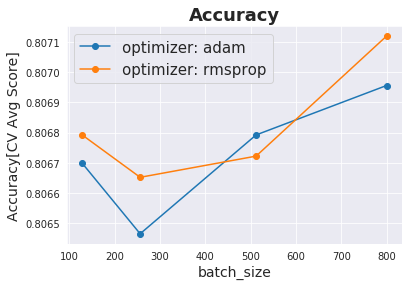

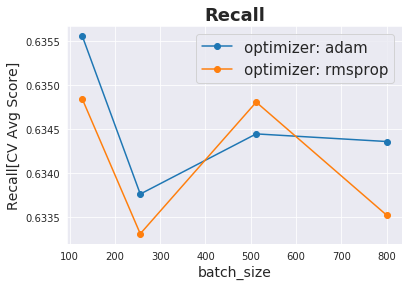

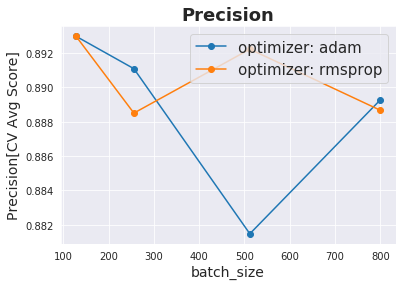

In [17]:
# Calling Method 
plot_grid_search(grid_search_acc.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Accuracy')
plot_grid_search(grid_search_rec.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Recall')
plot_grid_search(grid_search_prec_avg.cv_results_, params['batch_size'], params['optimizer'], 'batch_size', 'optimizer', 'Precision')


In [18]:
def return_index_list(param1, param2):
    list=[]
    for p1 in param1:
        for p2 in param2:
            list.append('['+str(p1)+', '+str(p2)+']')
    return list

In [19]:
index= return_index_list(params['batch_size'], params['optimizer'])

df= pd.DataFrame({  'Accuracy': grid_search_acc.cv_results_['mean_test_score'],
                    'Precision(Avg)': grid_search_prec_avg.cv_results_['mean_test_score'],
                    'Recall(Avg)': grid_search_rec.cv_results_['mean_test_score'],
                    'std_cross_validation': grid_search_acc.cv_results_['std_test_score']},
                 index=index)

writer = pd.ExcelWriter('Neural_Network.xlsx')
df.to_excel(writer, 'Neural_Network')
writer.save()
writer.close()

In [20]:
df

,Accuracy,Precision(Avg),Recall(Avg),std_cross_validation
"[128, adam]",0.806699,0.892969,0.635554,0.001443
"[128, rmsprop]",0.806792,0.892976,0.634841,0.001349
"[256, adam]",0.806465,0.891078,0.633765,0.001956
"[256, rmsprop]",0.806652,0.888491,0.633315,0.001022
"[512, adam]",0.806792,0.881462,0.634446,0.001863
"[512, rmsprop]",0.806722,0.892214,0.634806,0.001606
"[800, adam]",0.806955,0.889259,0.634360,0.001699
"[800, rmsprop]",0.807119,0.888657,0.633526,0.001863


In [21]:
## check for overfiting
model_ov= create_model("adam")
history= model_ov.fit(x=X_train, y=Y_train, epochs=300, batch_size=800, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop])


Train on 42845 samples, validate on 18363 samples
Epoch 1/300
42845/42845 [==============================] - 1s 31us/sample - loss: 0.6561 - accuracy: 0.6406 - val_loss: 0.5541 - val_accuracy: 0.7440
Epoch 2/300
42845/42845 [==============================] - 1s 12us/sample - loss: 0.5495 - accuracy: 0.7602 - val_loss: 0.4879 - val_accuracy: 0.7988
Epoch 3/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.5063 - accuracy: 0.7824 - val_loss: 0.4576 - val_accuracy: 0.8006
Epoch 4/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4794 - accuracy: 0.7919 - val_loss: 0.4426 - val_accuracy: 0.8009
Epoch 5/300
42845/42845 [==============================] - 1s 13us/sample - loss: 0.4643 - accuracy: 0.7975 - val_loss: 0.4342 - val_accuracy: 0.8010
Epoch 6/300
42845/42845 [==============================] - 1s 33us/sample - loss: 0.4548 - accuracy: 0.7994 - val_loss: 0.4295 - val_accuracy: 0.8009
Epoch 7/300
42845/42845 [=========================

42845/42845 [==============================] - 0s 8us/sample - loss: 0.4158 - accuracy: 0.8069 - val_loss: 0.4174 - val_accuracy: 0.8009
Epoch 56/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4150 - accuracy: 0.8065 - val_loss: 0.4174 - val_accuracy: 0.8010
Epoch 57/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4149 - accuracy: 0.8064 - val_loss: 0.4175 - val_accuracy: 0.8010
Epoch 58/300
42845/42845 [==============================] - 0s 10us/sample - loss: 0.4154 - accuracy: 0.8064 - val_loss: 0.4175 - val_accuracy: 0.8008
Epoch 59/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4153 - accuracy: 0.8068 - val_loss: 0.4175 - val_accuracy: 0.8010
Epoch 60/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4151 - accuracy: 0.8064 - val_loss: 0.4173 - val_accuracy: 0.8008
Epoch 61/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4152 - accuracy: 0.8067 - va

42845/42845 [==============================] - 0s 8us/sample - loss: 0.4134 - accuracy: 0.8073 - val_loss: 0.4173 - val_accuracy: 0.8008
Epoch 110/300
42845/42845 [==============================] - 1s 28us/sample - loss: 0.4139 - accuracy: 0.8066 - val_loss: 0.4171 - val_accuracy: 0.8010
Epoch 111/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.4135 - accuracy: 0.8062 - val_loss: 0.4171 - val_accuracy: 0.8010
Epoch 112/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4133 - accuracy: 0.8063 - val_loss: 0.4171 - val_accuracy: 0.8010
Epoch 113/300
42845/42845 [==============================] - 0s 11us/sample - loss: 0.4126 - accuracy: 0.8068 - val_loss: 0.4170 - val_accuracy: 0.8009
Epoch 114/300
42845/42845 [==============================] - 0s 8us/sample - loss: 0.4135 - accuracy: 0.8067 - val_loss: 0.4170 - val_accuracy: 0.8010
Epoch 115/300
42845/42845 [==============================] - 0s 9us/sample - loss: 0.4120 - accuracy: 0.

42845/42845 [==============================] - 1s 15us/sample - loss: 0.4120 - accuracy: 0.8065 - val_loss: 0.4168 - val_accuracy: 0.8008
Epoch 164/300
42845/42845 [==============================] - 1s 19us/sample - loss: 0.4122 - accuracy: 0.8062 - val_loss: 0.4167 - val_accuracy: 0.8008
Epoch 165/300
42845/42845 [==============================] - 1s 21us/sample - loss: 0.4128 - accuracy: 0.8071 - val_loss: 0.4171 - val_accuracy: 0.8009
Epoch 166/300
42845/42845 [==============================] - 1s 24us/sample - loss: 0.4119 - accuracy: 0.8063 - val_loss: 0.4167 - val_accuracy: 0.8008
Epoch 167/300
42845/42845 [==============================] - 1s 23us/sample - loss: 0.4121 - accuracy: 0.8067 - val_loss: 0.4167 - val_accuracy: 0.8008
Epoch 168/300
42845/42845 [==============================] - 1s 21us/sample - loss: 0.4112 - accuracy: 0.8068 - val_loss: 0.4166 - val_accuracy: 0.8010
Epoch 169/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.4119 - accuracy:

Epoch 217/300
42845/42845 [==============================] - 1s 15us/sample - loss: 0.4107 - accuracy: 0.8073 - val_loss: 0.4167 - val_accuracy: 0.8011
Epoch 218/300
42845/42845 [==============================] - 2s 38us/sample - loss: 0.4115 - accuracy: 0.8066 - val_loss: 0.4167 - val_accuracy: 0.8010
Epoch 219/300
42845/42845 [==============================] - 1s 16us/sample - loss: 0.4119 - accuracy: 0.8062 - val_loss: 0.4168 - val_accuracy: 0.8010
Epoch 220/300
42845/42845 [==============================] - 1s 16us/sample - loss: 0.4114 - accuracy: 0.8061 - val_loss: 0.4169 - val_accuracy: 0.8009
Epoch 221/300
42845/42845 [==============================] - 1s 17us/sample - loss: 0.4117 - accuracy: 0.8071 - val_loss: 0.4170 - val_accuracy: 0.8009
Epoch 222/300
42845/42845 [==============================] - 1s 14us/sample - loss: 0.4113 - accuracy: 0.8069 - val_loss: 0.4166 - val_accuracy: 0.8010
Epoch 223/300
42845/42845 [==============================] - 1s 16us/sample - loss: 0.41

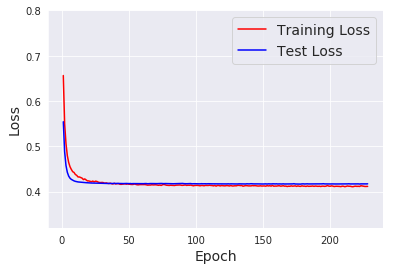

In [22]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
_, ax = plt.subplots(1,1)
ax.set_ylim([0.32,0.8])
ax.plot(epoch_count, training_loss, 'r-')
ax.plot(epoch_count, test_loss, 'b-')

ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.legend(['Training Loss', 'Test Loss'], fontsize=14)
ax.grid('on')
